<a href="https://colab.research.google.com/github/MihailSandulescu/TehniciSimulare/blob/master/Tema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TEMA 2 (problema 11)


Să se genereze prin două metode variabila Beta(0.75,4) (curs6). Să se genereze variabila hipergeometrică cu parametrii citiți de la tastatură (curs 7).

In [ ]:
import numpy as np
import random

def generare_beta(a, b, metoda):
    if metoda == "distributie_gamma":
      x1 = random.gammavariate(a, 1)
      x2 = random.gammavariate(b, 1)
      return x1 / (x1 + x2)
    elif metoda == "distributii_uniforme":
        for ndx in range (1, 1000000000):
          v = pow(random.uniform(0, 1), (1 / a))
          t = pow(random.uniform(0, 1), (1 / (b - 1)))
          if v + t < 1:
            return v
    else:
      return np.random.beta(a, b, 1);

a = 0.75
b = 4
sample_gamma = [generare_beta(a, b, "distributie_gamma") for _ in range(1000000)]
sample_uniform = [generare_beta(a, b, "distributii_uniforme") for _ in range(1000000)]
sample_default = [generare_beta(a, b, "default") for _ in range(1000000)]\

media = a/(a+b)
deviatia_standard=np.sqrt((a*b)/((pow((a+b), 2))*(a+b+1)))

print(media,";", deviatia_standard, "\n")
print(np.mean(sample_gamma),";", np.std(sample_gamma),"\n")
print(np.mean(sample_uniform),";", np.std(sample_uniform),"\n")
print(np.mean(sample_default),";", np.std(sample_default),"\n")

0.15789473684210525 ; 0.15206634073991898 

0.15770327411489377 ; 0.151923504010263 

0.15766689179641719 ; 0.1519755101692517 

0.15806542803465895 ; 0.1521429077274942 



In [ ]:
from scipy.stats import hypergeom

A = int(input("A:"))
B = int(input("B:"))
n = int(input("n:"))
N = int(A+B)

variabila_aleatoare = hypergeom.rvs(A,n,N);

print(variabila_aleatoare)


A:20
B:7
n:12


ValueError: ignored

Rezolvare tds:
https://towardsdatascience.com/hypergeometric-distribution-explained-with-python-2c80bc613bf4

A:20
B:12
n:7


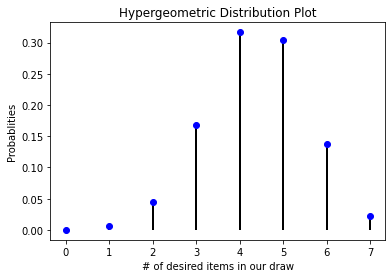

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import comb

def hypergeom_pmf(N, A, n, x):
    
    '''
    Probability Mass Function for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param x: number of desired items in our draw of n items
    :returns: PMF computed at x
    '''
    Achoosex = comb(A,x)
    NAchoosenx = comb(N-A, n-x)
    Nchoosen = comb(N,n)
    
    return (Achoosex)*NAchoosenx/Nchoosen

def hypergeom_cdf(N, A, n, t, min_value=None):
    
    '''
    Cumulative Density Funtion for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param t: number of desired items in our draw of n items up to t
    :returns: CDF computed up to t
    '''
    if min_value:
        return np.sum([hypergeom_pmf(N, A, n, x) for x in range(min_value, t+1)])
    
    return np.sum([hypergeom_pmf(N, A, n, x) for x in range(t+1)])
    
def hypergeom_plot(N, A, n):
    
    '''
    Visualization of Hypergeometric Distribution for given parameters
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :returns: Plot of Hypergeometric Distribution for given parameters
    '''
    
    x = np.arange(0, n+1)
    y = [hypergeom_pmf(N, A, n, x) for x in range(n+1)]
    plt.plot(x, y, 'bo')
    plt.vlines(x, 0, y, lw=2)
    plt.xlabel('# of desired items in our draw')
    plt.ylabel('Probablities')
    plt.title('Hypergeometric Distribution Plot')
    plt.show()


A = int(input("A:"))
B = int(input("B:"))
n = int(input("n:"))
N = int(A+B)

hypergeom_plot(N, A, n)